In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("D:\Omdena SL Autism with ML\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set")

In [3]:
SA = pd.read_csv("Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv")

In [4]:
SA

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,1,1,0,1,1,1,0,1,0,Madinah Province,No,Family member,35,Male,6,1
502,0,1,1,1,0,0,1,1,1,1,Qassim Province,No,Other,32,Female,7,1
503,1,1,1,1,1,1,0,0,1,0,Najran Province,Yes,Family member,29,Female,7,1
504,0,1,1,1,1,1,0,0,0,0,Madinah Province,No,Family member,15,Female,5,1


# Exploratory Data Analysis(EDA)

In [5]:
SA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   A10                             506 non-null    int64 
 1   A9                              506 non-null    int64 
 2   A8                              506 non-null    int64 
 3   A7                              506 non-null    int64 
 4   A6                              506 non-null    int64 
 5   A5                              506 non-null    int64 
 6   A4                              506 non-null    int64 
 7   A3                              506 non-null    int64 
 8   A2                              506 non-null    int64 
 9   A1                              506 non-null    int64 
 10  Region                          506 non-null    object
 11  Family member with ASD history  506 non-null    object
 12  Who is completing the test      506 non-null    ob

In [6]:
SA.describe()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Age,Screening Score,Class
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.620553,0.543478,0.575099,0.553360,0.549407,0.559289,0.525692,0.511858,0.488142,0.563241,24.448617,5.490119,0.673913
std,0.485730,0.498599,0.494817,0.497637,0.498045,0.496964,0.499834,0.500354,0.500354,0.496475,8.344461,3.181771,0.469243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,3.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,24.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000,1.000000


In [7]:
SA.size

8602

In [8]:
SA.shape

(506, 17)

In [9]:
SA.sample(n = 10)

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
63,1,0,1,1,0,1,1,0,1,0,Makkah Province,No,Family member,36,Female,6,1
475,1,0,0,0,0,0,0,0,0,0,Tabuk Province,No,Other,19,Female,1,0
500,1,1,1,1,1,1,1,1,1,1,Qassim Province,Yes,Family member,25,Male,10,1
361,1,1,1,1,1,1,0,0,0,0,Madinah Province,No,Family member,19,Male,6,1
457,0,1,1,1,1,1,1,1,1,1,Qassim Province,No,Family member,26,Female,9,1
227,1,1,1,1,1,1,1,1,1,1,Riyadh Province,Yes,Family member,21,Female,10,1
76,1,1,1,1,1,1,1,0,1,1,Makkah Province,No,Family member,36,Male,9,1
166,1,1,1,0,1,1,0,0,1,0,Riyadh Province,No,Family member,12,Male,6,1
5,0,0,0,1,1,1,0,1,0,0,Eastern Province,No,Family member,17,Male,4,1
140,1,1,1,1,1,1,1,1,1,1,Makkah Province,Yes,Other,12,Female,10,1


In [10]:
SA.isnull().sum()

A10                               0
A9                                0
A8                                0
A7                                0
A6                                0
A5                                0
A4                                0
A3                                0
A2                                0
A1                                0
Region                            0
Family member with ASD history    0
Who is completing the test        0
Age                               0
Gender                            0
Screening Score                   0
Class                             0
dtype: int64

In [11]:
SA.duplicated().sum()

25

In [12]:
SA.drop_duplicates(inplace = True)

In [13]:
SA.columns

Index(['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1', 'Region',
       'Family member with ASD history', 'Who is completing the test', 'Age',
       'Gender', 'Screening Score', 'Class'],
      dtype='object')

In [14]:
SA.Region.value_counts()

Makkah Province              200
Riyadh Province               77
Eastern Province              50
Madinah Province              23
Qassim Province               22
Jizan Province                19
Tabuk Province                18
Ha'il Province                16
Northern Borders Province     15
Aseer Province                13
Al Jawf Province              12
Najran Province                9
Al Baha Province               7
Name: Region, dtype: int64

#  Data Visualization

In [15]:
SA1 = SA.copy()

In [16]:
SA1

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,1,1,0,1,1,1,0,1,0,Madinah Province,No,Family member,35,Male,6,1
502,0,1,1,1,0,0,1,1,1,1,Qassim Province,No,Other,32,Female,7,1
503,1,1,1,1,1,1,0,0,1,0,Najran Province,Yes,Family member,29,Female,7,1
504,0,1,1,1,1,1,0,0,0,0,Madinah Province,No,Family member,15,Female,5,1


In [17]:
SA1.drop(["Who is completing the test","Gender","Region"], axis = 1, inplace = True)

In [18]:
SA1.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family member with ASD history,Age,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,No,32,3,0
1,0,0,1,0,0,1,0,1,0,0,No,30,3,0
2,0,0,0,1,0,0,0,0,0,0,No,36,1,0
3,0,0,0,0,0,0,0,0,0,0,Yes,36,0,0
4,0,0,0,0,0,0,0,0,0,0,No,36,0,0


In [19]:
Age = SA1.groupby("A1").A1.count().sort_values(ascending = False).to_frame()

In [20]:
Age.rename(columns={'A1':"Age"},inplace=True)

In [21]:
Age = Age.reset_index()

In [22]:
Age

,A1,Age
0,1,275
1,0,206


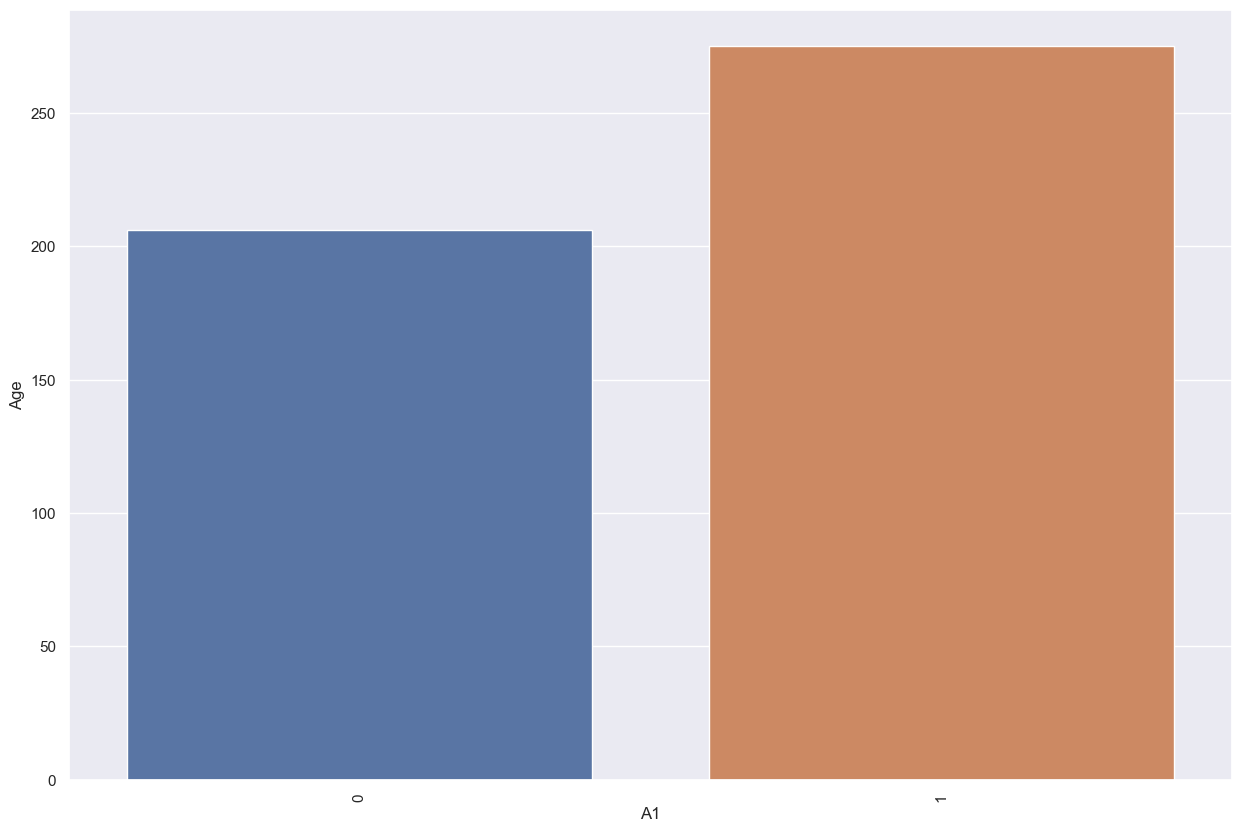

In [23]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A1',y='Age')
ax.tick_params(axis='x',rotation=90)

In [24]:
Age = SA1.groupby("A2").A2.count().sort_values(ascending = False).to_frame()

In [25]:
Age.rename(columns={'A2':"Age"},inplace=True)
Age = Age.reset_index()
Age

,A2,Age
0,0,242
1,1,239


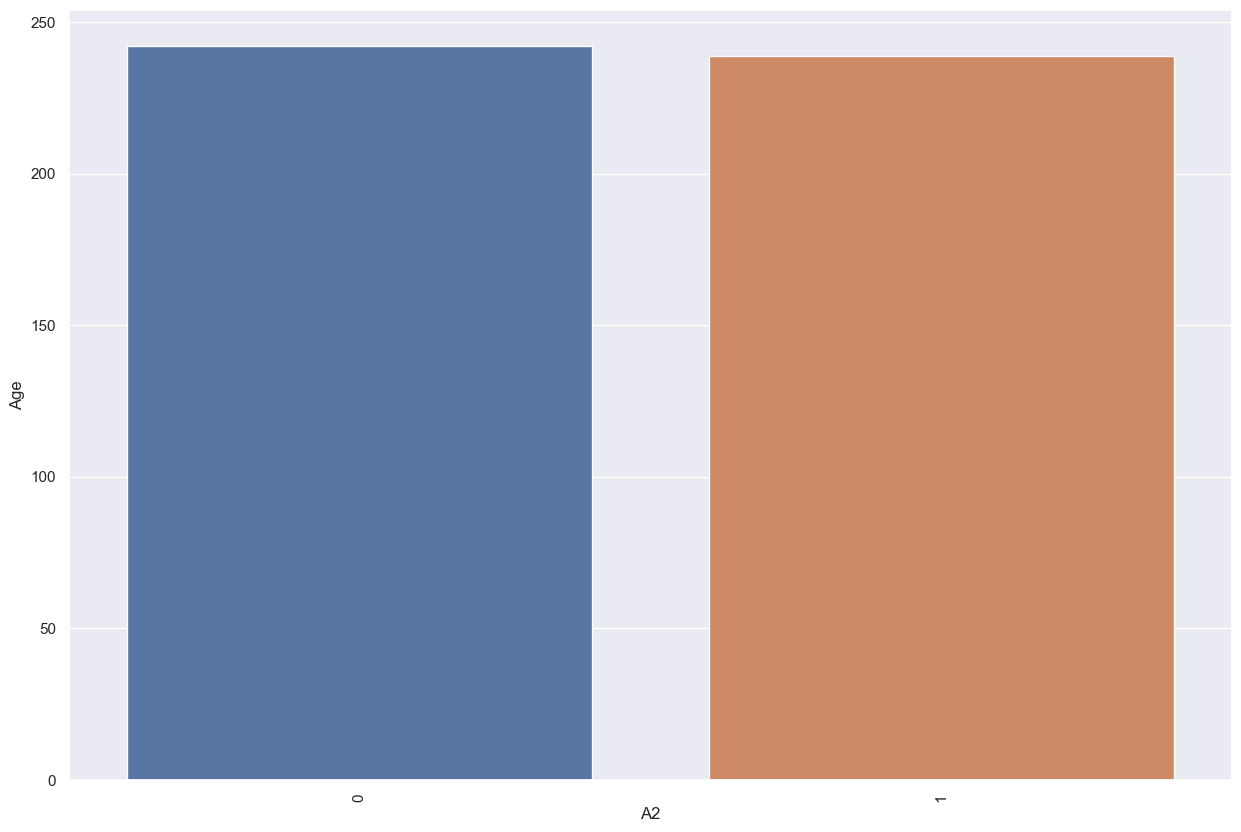

In [26]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A2',y='Age')
ax.tick_params(axis='x',rotation=90)

In [27]:
Age = SA1.groupby("A3").A3.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A3':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A3,Age
0,1,249
1,0,232


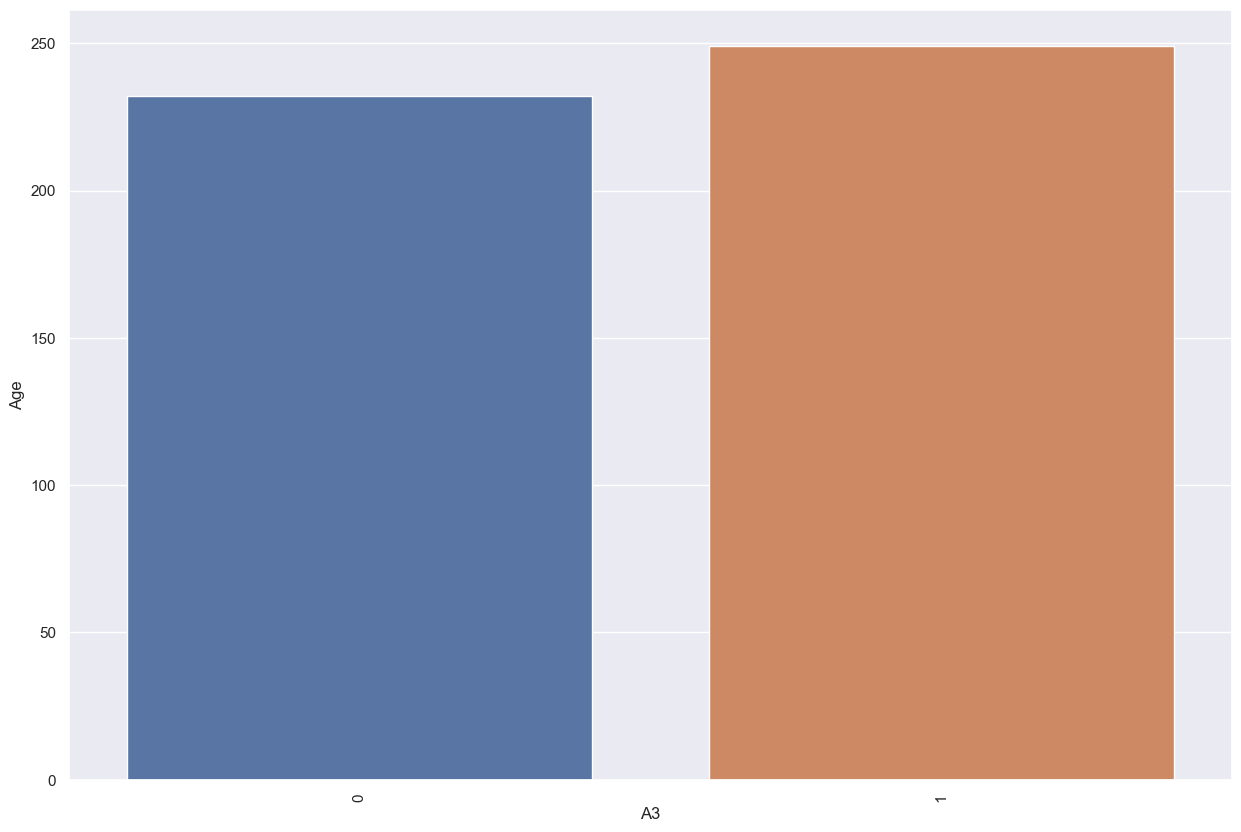

In [28]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A3',y='Age')
ax.tick_params(axis='x',rotation=90)

In [29]:
Age = SA1.groupby("A4").A4.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A4':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A4,Age
0,1,255
1,0,226


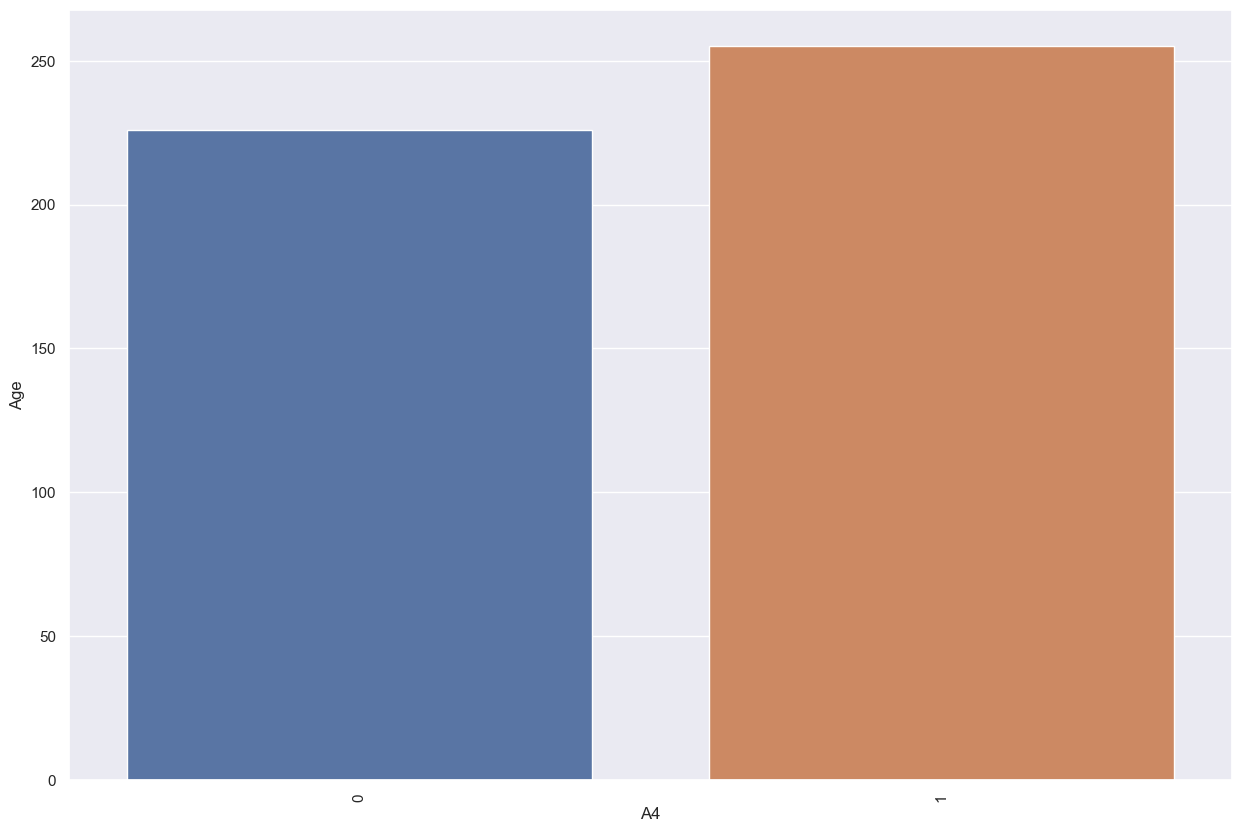

In [30]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A4',y='Age')
ax.tick_params(axis='x',rotation=90)

In [31]:
Age = SA1.groupby("A5").A5.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A5':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A5,Age
0,1,269
1,0,212


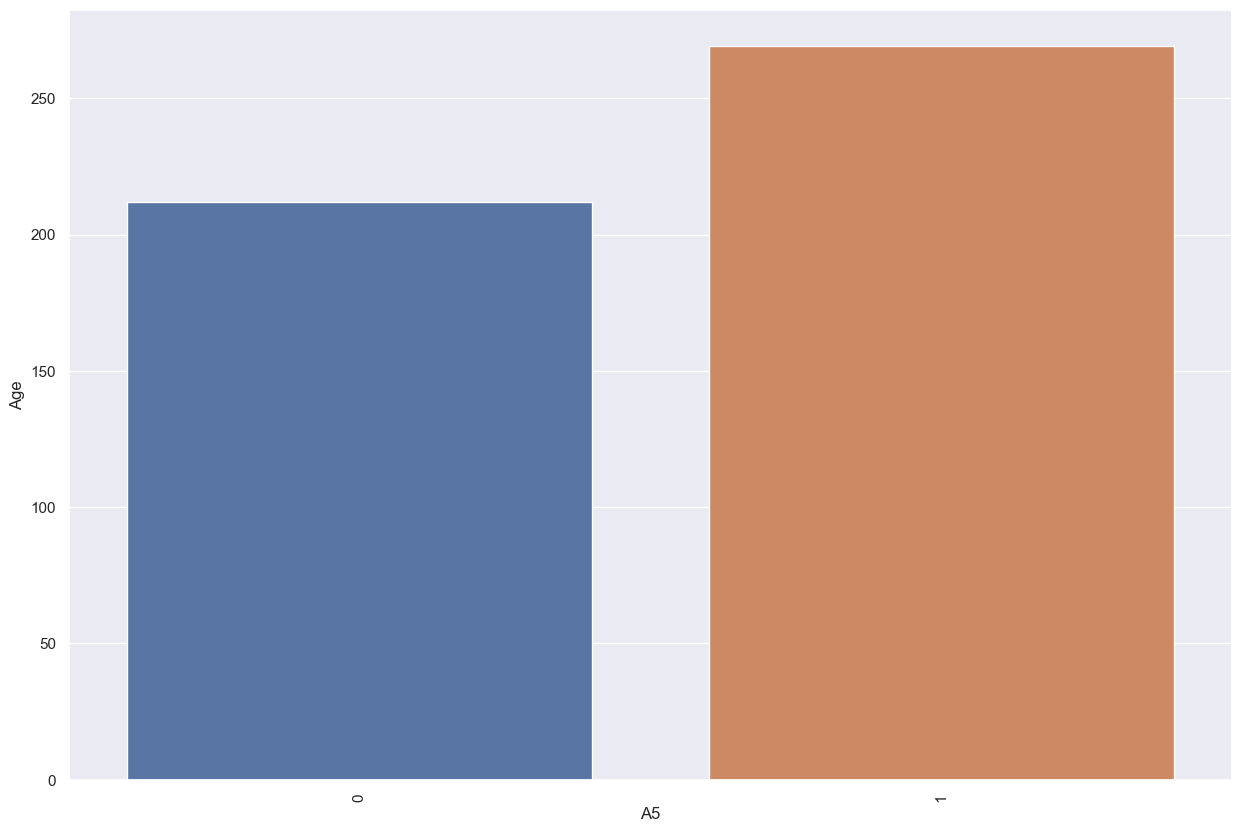

In [32]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A5',y='Age')
ax.tick_params(axis='x',rotation=90)

In [33]:
Age = SA1.groupby("A6").A6.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A6':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A6,Age
0,1,268
1,0,213


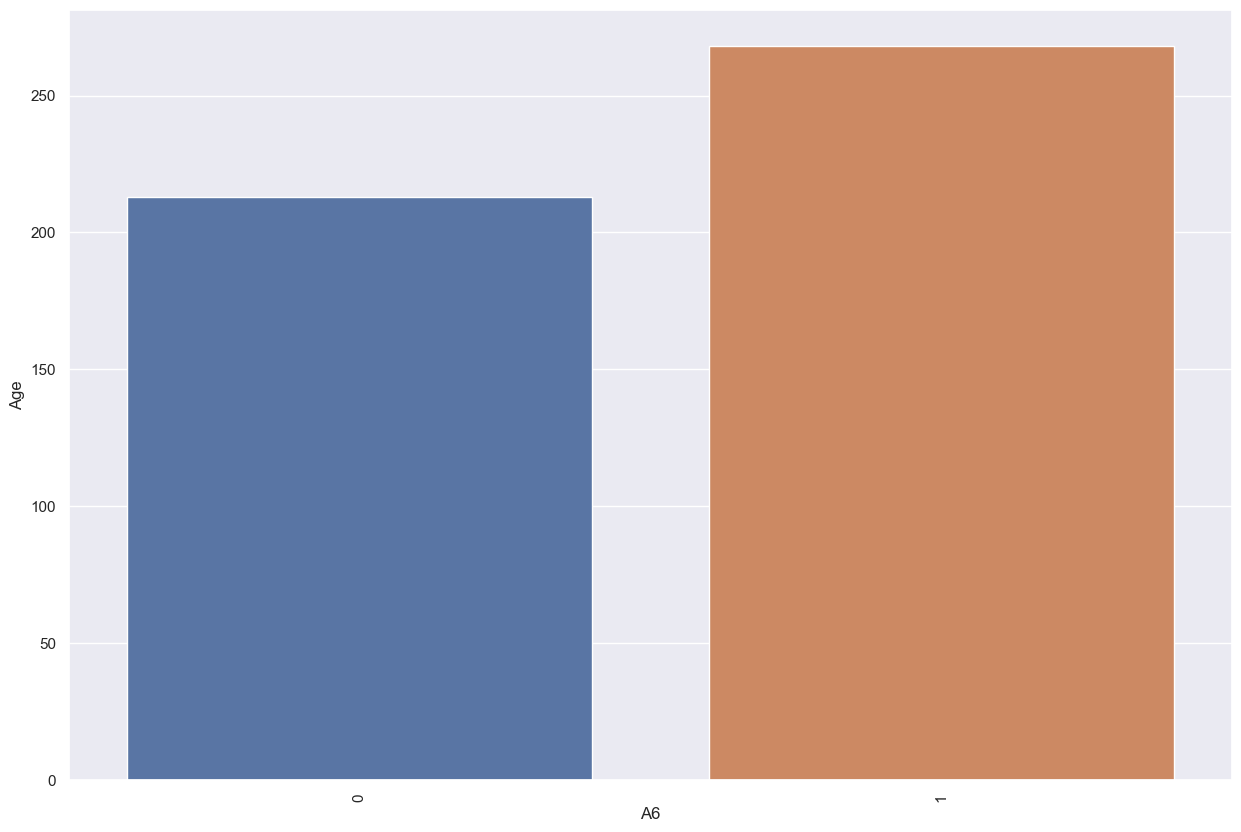

In [34]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A6',y='Age')
ax.tick_params(axis='x',rotation=90)

In [35]:
Age = SA1.groupby("A7").A7.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A7':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A7,Age
0,1,266
1,0,215


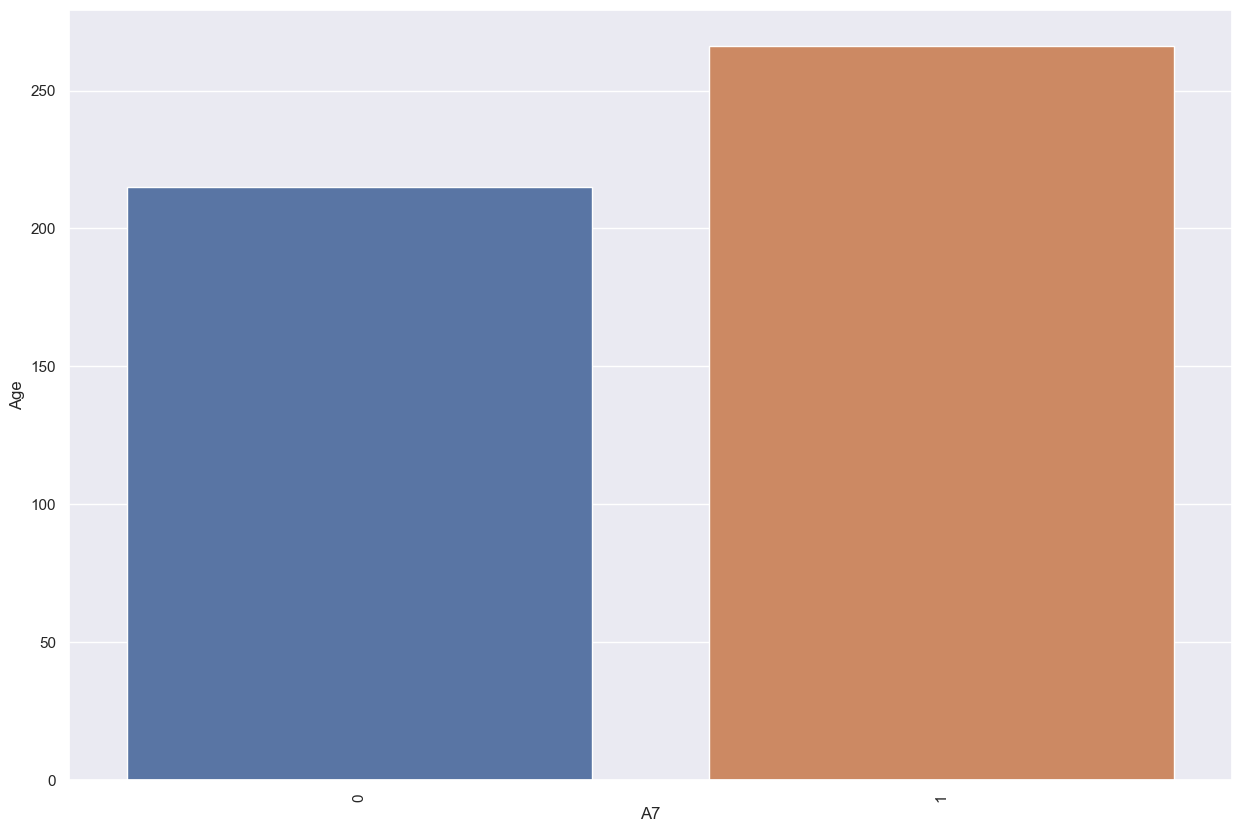

In [36]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A7',y='Age')
ax.tick_params(axis='x',rotation=90)

In [37]:
Age = SA1.groupby("A8").A8.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A8':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A8,Age
0,1,281
1,0,200


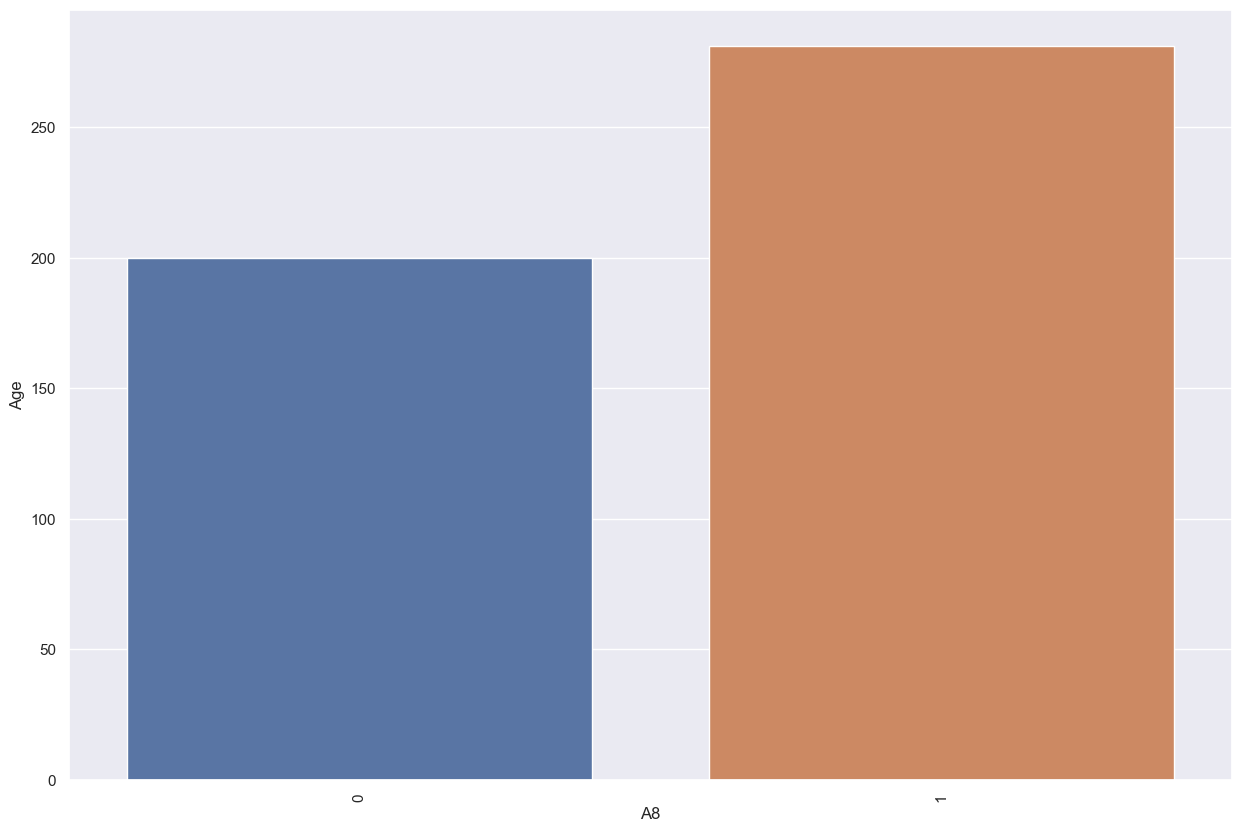

In [38]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A8',y='Age')
ax.tick_params(axis='x',rotation=90)

In [39]:
Age = SA1.groupby("A9").A9.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A9':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A9,Age
0,1,264
1,0,217


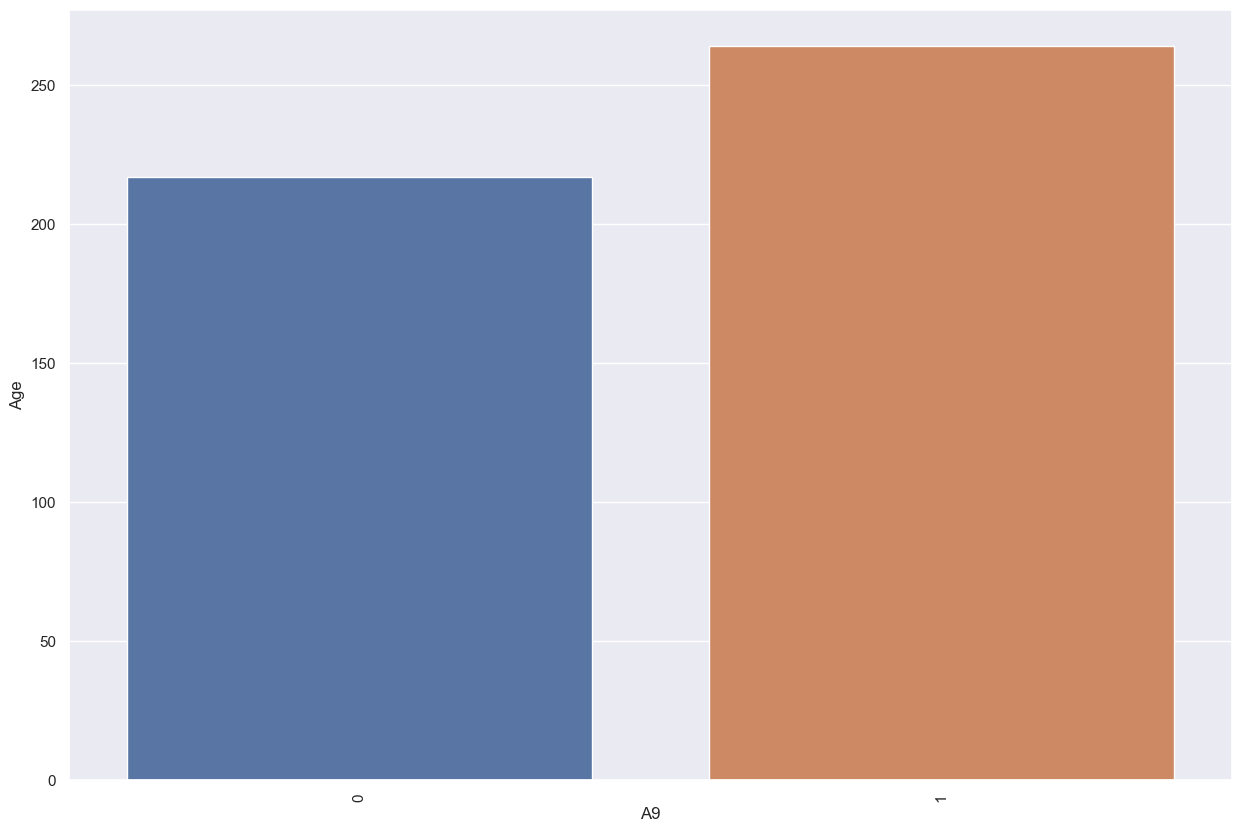

In [40]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A9',y='Age')
ax.tick_params(axis='x',rotation=90)

In [41]:
Age = SA1.groupby("A10").A10.count().sort_values(ascending = False).to_frame()

Age.rename(columns={'A10':"Age"},inplace=True)
Age = Age.reset_index()
Age


,A10,Age
0,1,303
1,0,178


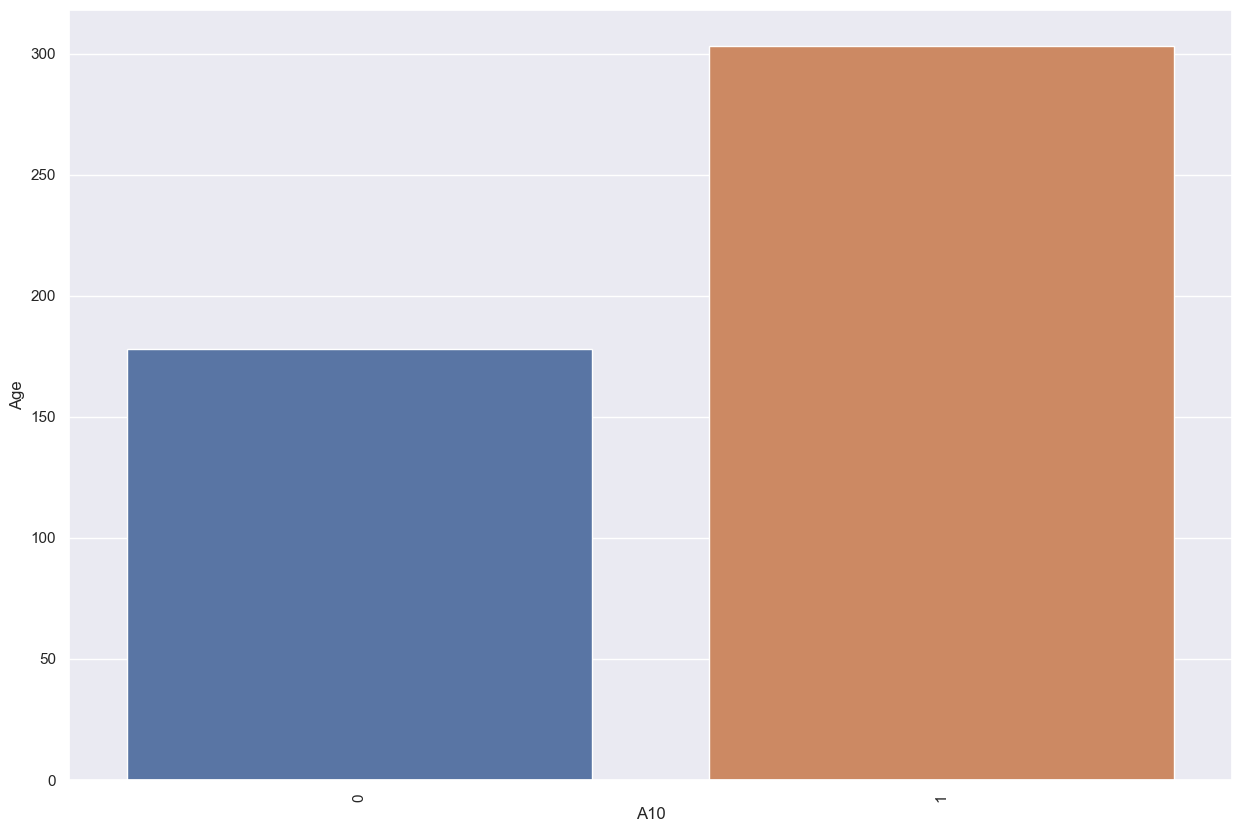

In [42]:
sns.set(rc={"figure.figsize" :(15,10)})
ax = sns.barplot(data=Age,x='A10',y='Age')
ax.tick_params(axis='x',rotation=90)

<AxesSubplot: ylabel='Family member with ASD history'>

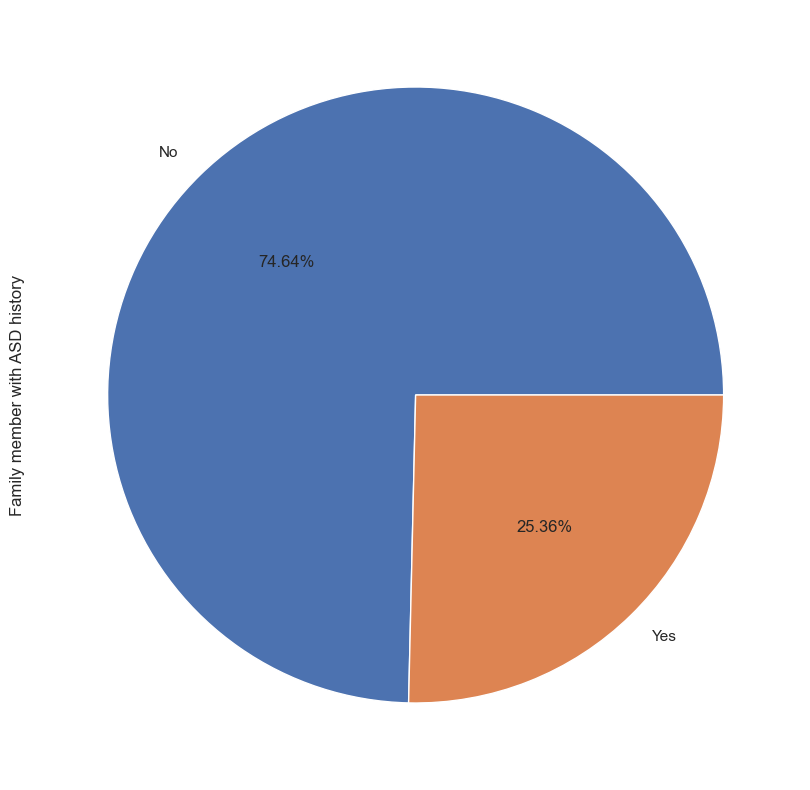

In [43]:
SA1['Family member with ASD history'].value_counts().plot(kind='pie',autopct='%1.2f%%')

<AxesSubplot: ylabel='Screening Score'>

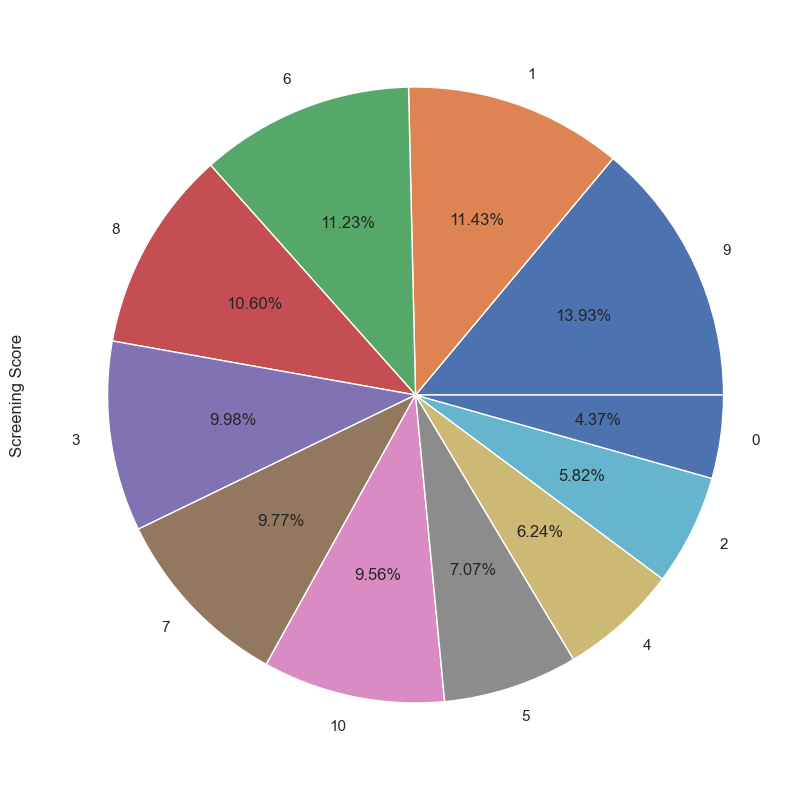

In [44]:
SA1['Screening Score'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [45]:
SA1.head(2)

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family member with ASD history,Age,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,No,32,3,0
1,0,0,1,0,0,1,0,1,0,0,No,30,3,0


<AxesSubplot: ylabel='Gender'>

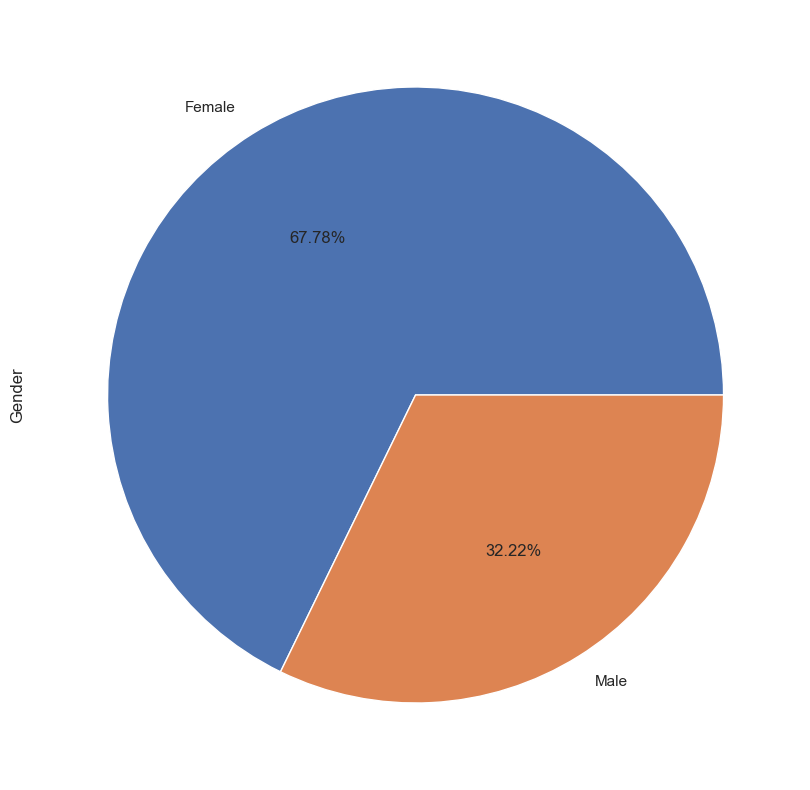

In [46]:
SA['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [47]:
SA2 = SA.copy()

In [48]:
SA2.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Screening Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0


In [49]:
SA2.rename({"Screening Score" : "Score"}, axis = 1, inplace = True)

In [50]:
SA2.head(2)

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0


<AxesSubplot: xlabel='Age', ylabel='Score'>

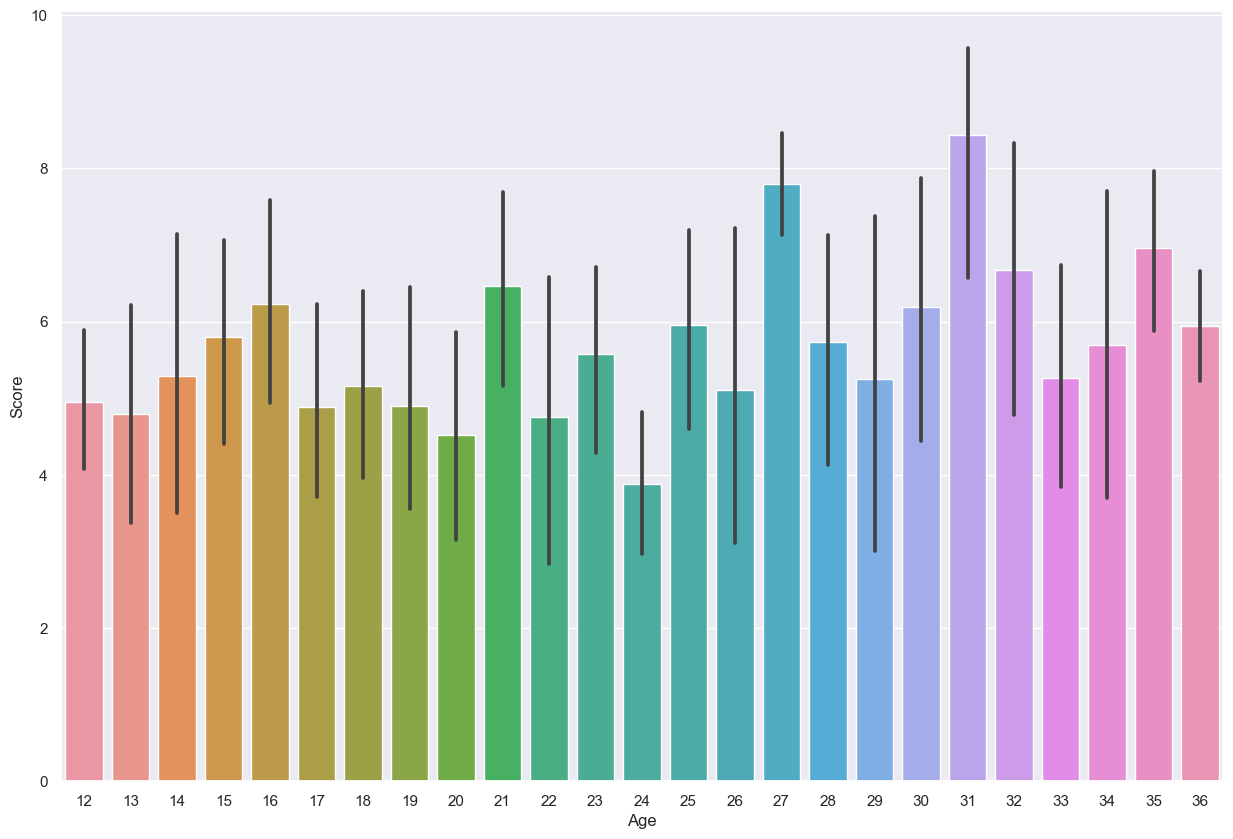

In [51]:
sns.barplot(data=SA2,x='Age',y='Score')

<AxesSubplot: xlabel='Score', ylabel='Region'>

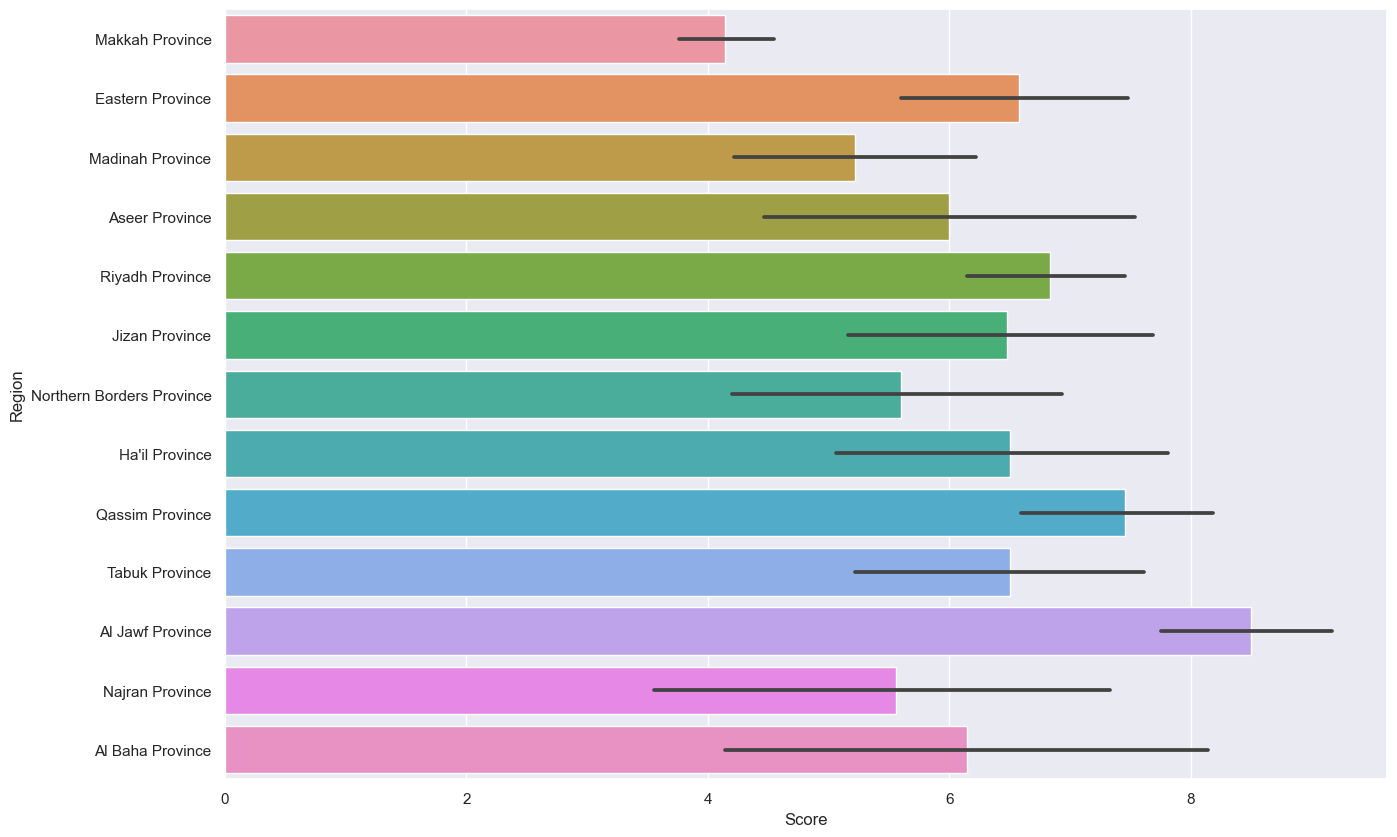

In [52]:
sns.barplot(data=SA2,x='Score',y='Region')

# Correlation

C:\Users\Ram\AppData\Local\Temp\ipykernel_17436\2393399017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= SA2.corr()
C:\Users\Ram\AppData\Local\Temp\ipykernel_17436\2393399017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(SA2.corr(),annot=True, cmap="Blues")


Text(0.5, 1.0, 'CORRELATION MAP')

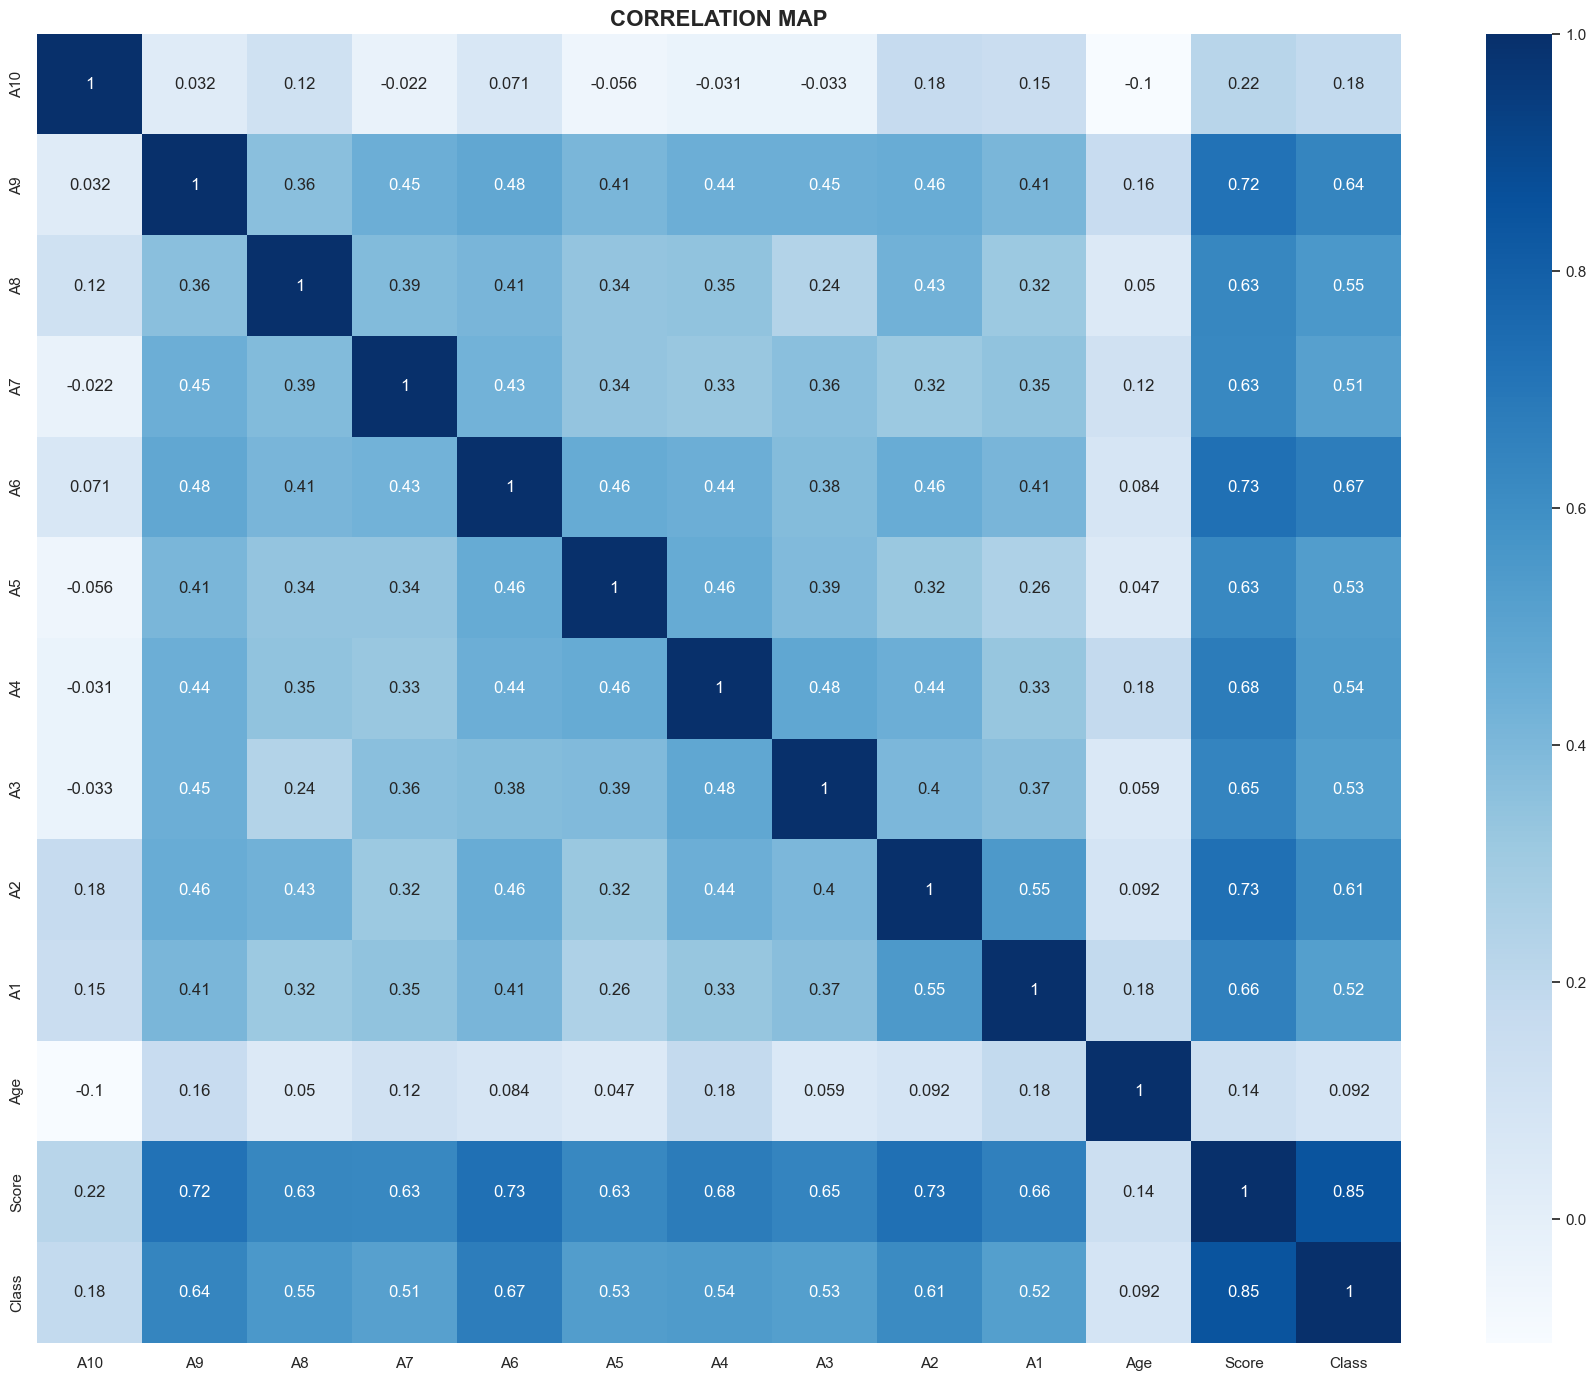

In [53]:
corr= SA2.corr()
plt.figure(figsize=(22,17))
sns.heatmap(SA2.corr(),annot=True, cmap="Blues")
plt.title("CORRELATION MAP", fontweight = "bold" ,fontsize = 16)

In [54]:
SA2

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family member with ASD history,Who is completing the test,Age,Gender,Score,Class
0,0,0,1,1,1,0,0,0,0,0,Makkah Province,No,Family member,32,Female,3,0
1,0,0,1,0,0,1,0,1,0,0,Makkah Province,No,Family member,30,Female,3,0
2,0,0,0,1,0,0,0,0,0,0,Makkah Province,No,Family member,36,Male,1,0
3,0,0,0,0,0,0,0,0,0,0,Makkah Province,Yes,Family member,36,Female,0,0
4,0,0,0,0,0,0,0,0,0,0,Eastern Province,No,Family member,36,Female,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0,1,1,0,1,1,1,0,1,0,Madinah Province,No,Family member,35,Male,6,1
502,0,1,1,1,0,0,1,1,1,1,Qassim Province,No,Other,32,Female,7,1
503,1,1,1,1,1,1,0,0,1,0,Najran Province,Yes,Family member,29,Female,7,1
504,0,1,1,1,1,1,0,0,0,0,Madinah Province,No,Family member,15,Female,5,1


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
SA3 = SA2.copy()

In [57]:
SA3.rename(columns = {'Family member with ASD history':'Family_member_with_ASD_history'}, inplace = True)


In [58]:
SA3.Family_member_with_ASD_history.replace({"Yes" : 1, "No" : 0}, inplace = True)

In [59]:
SA3.shape

(481, 17)

In [60]:
train,test = train_test_split(SA3, test_size = 0.3 )

In [61]:
train.shape

(336, 17)

In [62]:
test.shape

(145, 17)

In [63]:
train.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Region,Family_member_with_ASD_history,Who is completing the test,Age,Gender,Score,Class
435,1,1,0,1,0,1,1,1,1,1,Riyadh Province,0,Family member,35,Male,8,1
450,1,1,1,1,1,1,1,1,1,1,Eastern Province,0,Other,35,Female,10,1
484,1,0,1,1,1,0,0,1,1,1,Jizan Province,0,Family member,34,Female,7,1
290,0,1,1,1,1,1,1,1,1,1,Riyadh Province,0,Family member,33,Female,9,1
361,1,1,1,1,1,1,0,0,0,0,Madinah Province,0,Family member,19,Male,6,1


In [64]:
train.columns

Index(['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1', 'Region',
       'Family_member_with_ASD_history', 'Who is completing the test', 'Age',
       'Gender', 'Score', 'Class'],
      dtype='object')

In [65]:
train_X = train[['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1','Family_member_with_ASD_history', 'Age', 'Score']]
train_y = train.Class

In [66]:
test.columns

Index(['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1', 'Region',
       'Family_member_with_ASD_history', 'Who is completing the test', 'Age',
       'Gender', 'Score', 'Class'],
      dtype='object')

In [67]:
test_X = test[['A10', 'A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1','Family_member_with_ASD_history', 'Age', 'Score']]
test_y = test.Class

In [68]:
train_X.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family_member_with_ASD_history,Age,Score
435,1,1,0,1,0,1,1,1,1,1,0,35,8
450,1,1,1,1,1,1,1,1,1,1,0,35,10
484,1,0,1,1,1,0,0,1,1,1,0,34,7
290,0,1,1,1,1,1,1,1,1,1,0,33,9
361,1,1,1,1,1,1,0,0,0,0,0,19,6


In [69]:
train_y.head()

435    1
450    1
484    1
290    1
361    1
Name: Class, dtype: int64

In [70]:
test_X.head()

,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,Family_member_with_ASD_history,Age,Score
367,1,1,0,1,1,1,0,1,1,1,0,14,8
305,1,1,1,0,0,1,1,0,1,0,0,21,6
174,1,0,0,1,1,0,0,1,0,0,0,15,4
317,0,1,1,1,0,0,0,1,1,1,1,33,6
348,1,1,1,0,1,1,0,1,0,1,0,27,7


In [71]:
test_y.head()

367    1
305    1
174    1
317    1
348    1
Name: Class, dtype: int64

# Feature Engi

# Support Vector Machine (SVM)


In [72]:
from sklearn import svm
from sklearn import metrics

In [73]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is : ", metrics.accuracy_score(prediction, test_y))

The Accuracy of SVM is :  1.0


# Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print("The Accuracy of LR is : ", metrics.accuracy_score(prediction, test_y))

The Accuracy of LR is :  1.0


# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model2 = DecisionTreeClassifier()
model2.fit(train_X, train_y)
prediction = model2.predict(test_X)
print("The Accuracy of DT is : ", metrics.accuracy_score(prediction, test_y))

The Accuracy of DT is :  1.0


# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
model3 = KNeighborsClassifier(n_neighbors = 3)
model3.fit(train_X, train_y)
prediction = model3.predict(test_X)
print("The Accuracy of KNN is : ", metrics.accuracy_score(prediction, test_y))

The Accuracy of KNN is :  0.9793103448275862
